## Reproducing a known LJ potential for a composite nanoparticle

In this notebook a composite nanoparticle (a hollow spherical shell of beads) is created and a fictional force field is created for the bead-bead nonbonded interaction. The sum of the bead-bead interactions between two nanoparticles yields the interaction potential at a certain nanoparticle-nanoparticle separation. The interaction potential is evaluated over a series of center-of-mass separations to obtain a set of target data. Our goal here is to take this target data and perform an optimization between these same two composite nanoparticles and return the fictional bead-bead interaction parameters.

Create the composite nanoparticle prototype using the `CG_nano` class from within NanoOpt. This uses a golden spiral algorithm to generate a spherical shell where beads are approximately evenly spaced.

### Nanoparticle details
* **Radius = 5.0 nm**
* **Bead diameter (i.e. $\sigma_\mathrm{b}$) = 1.0 nm**
* **Bead volume fraction (i.e. $\phi_\mathrm{b}$) = 0.5**

In [2]:
from nanoparticle_optimization import CG_nano

nanoparticle = CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
nanoparticle.visualize()

/Users/summeraz/src/github/mosdef-hub/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_CGN pos=( 0.4088, 0.0000,-4.6838), 0 bonds, id: 112197968448>" is element: "EP"
  atom, element))


NGLWidget()

Define a Lennard-Jones potential for bead-bead interactions. Then, using this potential create a set of target data (stored in the `Target` class) that consists of 50 interaction potential values at center-of-mass distances ranging from 10.0nm to 12.0nm. The interaction potential is evaluated at each center-of-mass distance by summing all inter-nanoparticle bead-bead interactions, taking the average over 100 unique configurations.

### Force field parameters
* **$\sigma$ = 1.0 nm** (this should be the same value as the diameter of the beads)
* **$\epsilon$ = 1.0 kcal/mol**

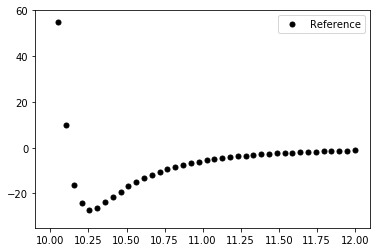

In [15]:
sigma_target = np_opt.Parameter(value=1.0, fixed=True)
epsilon_target = np_opt.Parameter(value=1.0, fixed=True)
lj_target = np_opt.LJ(sigma=sigma_target, epsilon=epsilon_target)

target_system = np_opt.System(nanoparticle)
r = np.linspace(10.0, 12.0, 40)
U = target_system.calc_potential(forcefield=lj_target, separations=r,
                                 configurations=100)
U = np.array([val[0] for val in U])
target = np_opt.Target(separations=r, potential=U)

fig = plt.figure()
plt.plot(r, U, linestyle='None', marker='o', color='black', markersize=5, label='Reference')
plt.legend()
plt.ylim(-35, 60)
plt.show()

In [16]:
gridpoints = 8
sigma = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
lj = np_opt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = np_opt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = np_opt.System(nano2)
optimization = np_opt.Optimization(forcefield=lj, systems=system, targets=target,
                                   configurations=10)
optimization.optimize(brute_force=False, verbose=True,
                      r_dependent_sampling=True, maxiter=50)

epsilon: 2.0

sigma: 2.0

Residual: 0.9998809816701371


epsilon: 2.1

sigma: 2.0

Residual: 0.9998930366457591


epsilon: 2.0

sigma: 2.1

Residual: 0.9999239024680456


epsilon: 2.0999999999999996

sigma: 1.9

Residual: 0.9997262477423083


epsilon: 2.1499999999999995

sigma: 1.7999999999999998

Residual: 0.9995734757003991


epsilon: 2.0499999999999994

sigma: 1.7999999999999998

Residual: 0.9995973519605994


epsilon: 2.1999999999999993

sigma: 1.5999999999999996

Residual: 0.9980681733054276


epsilon: 2.299999999999999

sigma: 1.3999999999999995

Residual: 0.988509178529178


epsilon: 2.399999999999999

sigma: 1.3999999999999995

Residual: 0.9900307612917804


epsilon: 2.549999999999998

sigma: 0.9999999999999991

Residual: 0.4704491878389012


epsilon: 2.7499999999999973

sigma: 0.5999999999999988

Residual: 0.8459649511846847


epsilon: 2.449999999999998

sigma: 0.9999999999999991

Residual: 0.45567551938261125


epsilon: 2.474999999999997

sigma: 0.7999999999999989

Residual: 

epsilon: 2.378611054643987

sigma: 0.944336736947297

Residual: 0.283366227243663


epsilon: 2.3786121837794765

sigma: 0.9443360701203336

Residual: 0.24112260836745475


epsilon: 2.3786116033792477

sigma: 0.9443366706371298

Residual: 0.2370011606433606


epsilon: 2.378612700849769

sigma: 0.9443365380167952

Residual: 0.2446766807521796


epsilon: 2.3786123130470496

sigma: 0.944336187094449

Residual: 0.26197552380625033


epsilon: 2.3786124423146227

sigma: 0.9443363040685644

Residual: 0.25940644040015554


epsilon: 2.3786127325147373

sigma: 0.9443360038101664

Residual: 0.25704045394154307


epsilon: 2.3786135714501127

sigma: 0.944335637241601

Residual: 0.3990327454871324


epsilon: 2.3786127245984954

sigma: 0.9443361373618235

Residual: 0.4023905557508872


epsilon: 2.3786130068823677

sigma: 0.9443359706550827

Residual: 0.23805367153920315


epsilon: 2.3786128617823104

sigma: 0.9443361207842818

Residual: 0.24271855936650327


epsilon: 2.378613426350055

sigma: 0.944335

Text(0,0.5,'U')

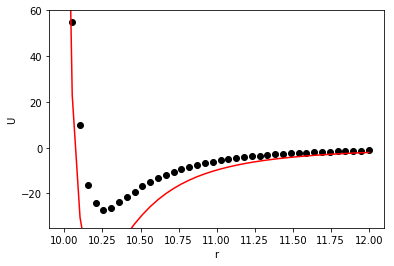

In [32]:
U_opt, _ = zip(*system.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

In [33]:
gridpoints = 8
sigma = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
lj = np_opt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = np_opt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = np_opt.System(nano2)
optimization = np_opt.Optimization(forcefield=lj, systems=system, targets=target,
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=True,
                      r_dependent_sampling=True, maxiter=50)

epsilon: 0.5

sigma: 0.5

Residual: 0.9890913051822139


epsilon: 0.5

sigma: 0.5

Residual: 0.9890173224348532


epsilon: 0.5

sigma: 0.9285714285714286

Residual: 0.61568004634875


epsilon: 0.5

sigma: 1.3571428571428572

Residual: 0.9164349716091468


epsilon: 0.5

sigma: 1.7857142857142856

Residual: 0.9979823833912084


epsilon: 0.5

sigma: 2.2142857142857144

Residual: 0.9998812712006687


epsilon: 0.5

sigma: 2.642857142857143

Residual: 0.9999854701170541


epsilon: 0.5

sigma: 3.071428571428571

Residual: 0.9999975843352428


epsilon: 0.5

sigma: 3.5

Residual: 0.9999995553155492


epsilon: 0.9285714285714286

sigma: 0.5

Residual: 0.980072914854941


epsilon: 0.9285714285714286

sigma: 0.9285714285714286

Residual: 0.4368065883567971


epsilon: 0.9285714285714286

sigma: 1.3571428571428572

Residual: 0.9544601549082989


epsilon: 0.9285714285714286

sigma: 1.7857142857142856

Residual: 0.9990273617568706


epsilon: 0.9285714285714286

sigma: 2.2142857142857144

Residual: 0.9

epsilon: 1.35634765625

sigma: 0.9518763950892857

Residual: 0.17063133983653467


epsilon: 1.3562813895089287

sigma: 0.9514003208705357

Residual: 0.1261107472939602


epsilon: 1.3554861886160716

sigma: 0.9514910016741074

Residual: 0.247020100049731


epsilon: 1.356132289341518

sigma: 0.9517800467354911

Residual: 0.2515074294894454


epsilon: 1.3559169224330359

sigma: 0.9516836983816965

Residual: 0.153168169165035


epsilon: 1.3559500558035715

sigma: 0.9519217354910714

Residual: 0.15878299488614825


epsilon: 1.3555193219866073

sigma: 0.9517290387834823

Residual: 0.21149670528909253


epsilon: 1.3558423723493305

sigma: 0.9518735613141741

Residual: 0.12898584751806783


epsilon: 1.3554779052734376

sigma: 0.9521569388253348

Residual: 0.11541598041801958


epsilon: 1.35518798828125

sigma: 0.9522504534040178

Residual: 0.08817277965874062


epsilon: 1.3552625383649555

sigma: 0.9520605904715402

Residual: 0.14633619440539744


epsilon: 1.355424063546317

sigma: 0.952132851

Text(0,0.5,'U')

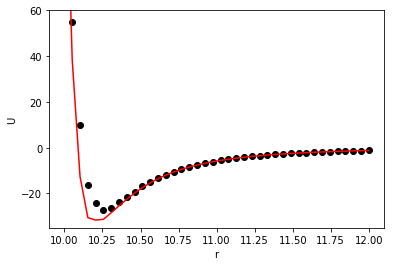

In [34]:
U_opt, _ = zip(*system.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

In [35]:
gridpoints = 16
sigma = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
lj = np_opt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = np_opt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = np_opt.System(nano2)
optimization = np_opt.Optimization(forcefield=lj, systems=system, targets=target,
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=True,
                      r_dependent_sampling=True, maxiter=50)

epsilon: 0.5

sigma: 0.5

Residual: 0.9890913051822139


epsilon: 0.5

sigma: 0.5

Residual: 0.9890173224348532


epsilon: 0.5

sigma: 0.7

Residual: 0.924557209393728


epsilon: 0.5

sigma: 0.9

Residual: 0.7152831113152509


epsilon: 0.5

sigma: 1.1

Residual: 0.35840848776418244


epsilon: 0.5

sigma: 1.3

Residual: 0.8906837093421701


epsilon: 0.5

sigma: 1.5

Residual: 0.9807290739436513


epsilon: 0.5

sigma: 1.7000000000000002

Residual: 0.9959352961142859


epsilon: 0.5

sigma: 1.9000000000000001

Residual: 0.9991026260379353


epsilon: 0.5

sigma: 2.1

Residual: 0.9997003323238909


epsilon: 0.5

sigma: 2.3

Residual: 0.999897106297628


epsilon: 0.5

sigma: 2.5

Residual: 0.9999671387827237


epsilon: 0.5

sigma: 2.7

Residual: 0.9999900661427733


epsilon: 0.5

sigma: 2.9000000000000004

Residual: 0.999994600887986


epsilon: 0.5

sigma: 3.1

Residual: 0.9999976870638083


epsilon: 0.5

sigma: 3.3000000000000003

Residual: 0.9999986958182234


epsilon: 0.5

sigma: 3.5

Resi

epsilon: 1.9000000000000001

sigma: 3.5

Residual: 0.9999998456403654


epsilon: 2.1

sigma: 0.5

Residual: 0.9560238351869537


epsilon: 2.1

sigma: 0.7

Residual: 0.73204429439469


epsilon: 2.1

sigma: 0.9

Residual: 0.3384162797891776


epsilon: 2.1

sigma: 1.1

Residual: 0.7221045398812178


epsilon: 2.1

sigma: 1.3

Residual: 0.9672717555414813


epsilon: 2.1

sigma: 1.5

Residual: 0.9940062795953911


epsilon: 2.1

sigma: 1.7000000000000002

Residual: 0.9991120024143143


epsilon: 2.1

sigma: 1.9000000000000001

Residual: 0.9997527597485826


epsilon: 2.1

sigma: 2.1

Residual: 0.9999271446102409


epsilon: 2.1

sigma: 2.3

Residual: 0.9999811530255626


epsilon: 2.1

sigma: 2.5

Residual: 0.999992260858244


epsilon: 2.1

sigma: 2.7

Residual: 0.9999973249788956


epsilon: 2.1

sigma: 2.9000000000000004

Residual: 0.999998844361707


epsilon: 2.1

sigma: 3.1

Residual: 0.9999994756325469


epsilon: 2.1

sigma: 3.3000000000000003

Residual: 0.9999997536288585


epsilon: 2.1

sig

epsilon: 3.5

sigma: 3.5

Residual: 0.9999999454446935


epsilon: 1.9000000000000001

sigma: 0.9

Residual: 0.26640201211078957


epsilon: 1.9950000000000003

sigma: 0.9

Residual: 0.2384146537615346


epsilon: 1.9000000000000001

sigma: 0.9450000000000001

Residual: 0.21001930850316483


epsilon: 1.9950000000000003

sigma: 0.9450000000000002

Residual: 0.24141793188819313


epsilon: 1.9712500000000004

sigma: 0.9337500000000001

Residual: 0.19178936627901083


epsilon: 1.8762500000000004

sigma: 0.9787500000000001

Residual: 0.29626740937504253


epsilon: 1.9653125000000005

sigma: 0.9196875

Residual: 0.20600459049912961


epsilon: 2.0365625000000005

sigma: 0.9084375

Residual: 0.2771402525884235


epsilon: 1.9341406250000004

sigma: 0.935859375

Residual: 0.1989556591872735


epsilon: 1.9400781250000003

sigma: 0.949921875

Residual: 0.1812312687634377


epsilon: 1.9274609375000002

sigma: 0.9650390625000003

Residual: 0.21390073002490617


epsilon: 1.9771875000000003

sigma: 0.947

epsilon: 1.950503206795547

sigma: 0.9493223657249477

Residual: 0.28721237727469706


epsilon: 1.9505031205760317

sigma: 0.9493223251355816

Residual: 0.26435495604757636


epsilon: 1.9505030628899116

sigma: 0.9493222528835763

Residual: 0.2639755523843929


epsilon: 1.9505031199567022

sigma: 0.949322189558298

Residual: 0.283518196891072


epsilon: 1.9505031204211993

sigma: 0.9493222912412607

Residual: 0.18683947037653612


epsilon: 1.9505032351741105

sigma: 0.9493223001679874

Residual: 0.23947942382357637


epsilon: 1.950503192103061

sigma: 0.9493222883468846

Residual: 0.29916219920020143


epsilon: 1.950503149032011

sigma: 0.9493222765257818

Residual: 0.23155294238697666


epsilon: 1.950503120266367

sigma: 0.9493222573469398

Residual: 0.21923810079897807


epsilon: 1.9505031488771785

sigma: 0.9493222426314611

Residual: 0.1988096957126588


epsilon: 1.950503206253634

sigma: 0.9493222470948246

Residual: 0.18674537638944594


epsilon: 1.9505032350192781

sigma: 0.9493

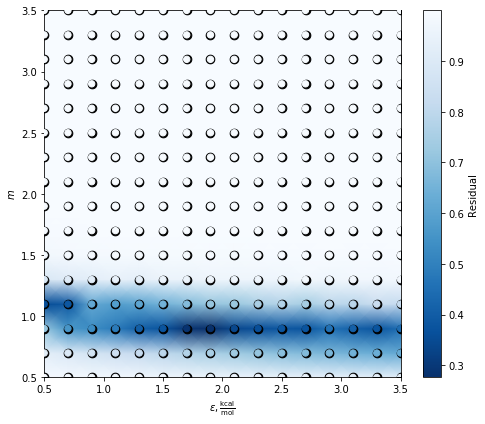

In [37]:
optimization.plot_heatmap('lj-heatmap.pdf')

In [39]:
gridpoints = 8
sigma = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
lj = np_opt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = np_opt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = np_opt.System(nano2)
optimization = np_opt.Optimization(forcefield=lj, systems=system, targets=target,
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=True,
                      r_dependent_sampling=True, maxiter=50, polishing_function=None)

epsilon: 0.5

sigma: 0.5

Residual: 0.9890913051822139


epsilon: 0.5

sigma: 0.5

Residual: 0.9890173224348532


epsilon: 0.5

sigma: 0.9285714285714286

Residual: 0.61568004634875


epsilon: 0.5

sigma: 1.3571428571428572

Residual: 0.9164349716091468


epsilon: 0.5

sigma: 1.7857142857142856

Residual: 0.9979823833912084


epsilon: 0.5

sigma: 2.2142857142857144

Residual: 0.9998812712006687


epsilon: 0.5

sigma: 2.642857142857143

Residual: 0.9999854701170541


epsilon: 0.5

sigma: 3.071428571428571

Residual: 0.9999975843352428


epsilon: 0.5

sigma: 3.5

Residual: 0.9999995553155492


epsilon: 0.9285714285714286

sigma: 0.5

Residual: 0.980072914854941


epsilon: 0.9285714285714286

sigma: 0.9285714285714286

Residual: 0.4368065883567971


epsilon: 0.9285714285714286

sigma: 1.3571428571428572

Residual: 0.9544601549082989


epsilon: 0.9285714285714286

sigma: 1.7857142857142856

Residual: 0.9990273617568706


epsilon: 0.9285714285714286

sigma: 2.2142857142857144

Residual: 0.9

In [51]:
grid_residuals = optimization.grid_residuals
epsilon_vals = optimization.grid[0]
sigma_vals = optimization.grid[1]
minimum = np.array(np.unravel_index(grid_residuals.argmin(), grid_residuals.shape))
epsilon_at_min = epsilon_vals[minimum[0]][0]
sigma_at_min = sigma_vals[0][minimum[1]]

# Set new bounds
try:
    emax = epsilon_vals[tuple(minimum + np.array([2, 0]))]
except IndexError:
    emax = epsilon_vals[-1, 0]
if minimum[0] - 2 >= 0:
    emin = epsilon_vals[tuple(minimum + np.array([-2, 0]))]
else:
    emin = epsilon_vals[0, 0]
    
try:
    smax = sigma_vals[tuple(minimum + np.array([0, 2]))]
except IndexError:
    smax = sigma_vals[0, -1]
if minimum[1] - 2 >= 0:
    smin = sigma_vals[tuple(minimum + np.array([0, -2]))]
else:
    smin = sigma_vals[0, 0]

print('Emax: {:.3f},\tEmin: {:.3f}'.format(emax, emin))
print('Smax: {:.3f},\tSmin: {:.3f}'.format(smax, smin))

Emax: 2.214,	Emin: 0.500
Smax: 1.786,	Smin: 0.500


In [52]:
gridpoints = 8
sigma = np_opt.Parameter(value=2., upper=smax, lower=smin)
epsilon = np_opt.Parameter(value=2., upper=emax, lower=emin)
lj = np_opt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = np_opt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = np_opt.System(nano2)
optimization = np_opt.Optimization(forcefield=lj, systems=system, targets=target,
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=True,
                      r_dependent_sampling=True, maxiter=50)

epsilon: 0.5

sigma: 0.5

Residual: 0.9890913051822139


epsilon: 0.5

sigma: 0.5

Residual: 0.9890173224348532


epsilon: 0.5

sigma: 0.6836734693877551

Residual: 0.9338257583870941


epsilon: 0.5

sigma: 0.8673469387755102

Residual: 0.7698153960346021


epsilon: 0.5

sigma: 1.0510204081632653

Residual: 0.1961846588349336


epsilon: 0.5

sigma: 1.2346938775510203

Residual: 0.7987513840112013


epsilon: 0.5

sigma: 1.4183673469387754

Residual: 0.9595891093900586


epsilon: 0.5

sigma: 1.6020408163265305

Residual: 0.9914297703707302


epsilon: 0.5

sigma: 1.7857142857142856

Residual: 0.9980332960115869


epsilon: 0.7448979591836735

sigma: 0.5

Residual: 0.983962025091845


epsilon: 0.7448979591836735

sigma: 0.6836734693877551

Residual: 0.9044502337312227


epsilon: 0.7448979591836735

sigma: 0.8673469387755102

Residual: 0.6468701676989528


epsilon: 0.7448979591836735

sigma: 1.0510204081632653

Residual: 0.27423272245414304


epsilon: 0.7448979591836735

sigma: 1.23469387755

epsilon: 0.5124755859375

sigma: 1.0253350705516582

Residual: 0.17258107383734253


epsilon: 0.512347412109375

sigma: 1.025149037886639

Residual: 0.20014273106790653


epsilon: 0.5126281738281249

sigma: 1.0249309306242025

Residual: 0.15660655539742527


epsilon: 0.5126525878906248

sigma: 1.0243407580317279

Residual: 0.37189017864143986


epsilon: 0.5125198364257812

sigma: 1.0250864924216756

Residual: 0.3504969928493035


epsilon: 0.5125640869140624

sigma: 1.024837914291693

Residual: 0.18382500704382168


epsilon: 0.5124877929687499

sigma: 1.0250399842554208

Residual: 0.17590026204027015


epsilon: 0.5124237060546875

sigma: 1.0249469679229113

Residual: 0.300083774431576


epsilon: 0.5125289916992186

sigma: 1.0248651776994975

Residual: 0.2000649249743064


epsilon: 0.5124938964843749

sigma: 1.0248924411073022

Residual: 0.1399407937374055


epsilon: 0.5125320434570312

sigma: 1.0247914061254382

Residual: 0.17330064448685895


epsilon: 0.5124618530273438

sigma: 1.02484

Text(0,0.5,'U')

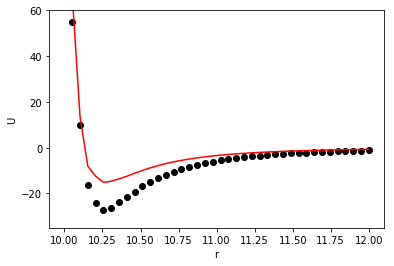

In [53]:
U_opt, _ = zip(*system.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

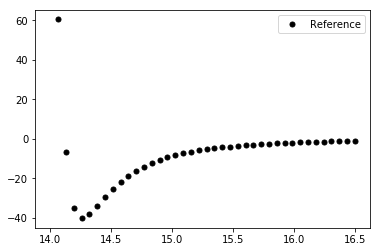

In [55]:
nano_target2 = np_opt.CG_nano(radius=7.0, bead_diameter=1.0, bvf=0.5)

target_system2 = np_opt.System(nano_target2)
r2 = np.linspace(14.0, 16.5, 40)
U2 = target_system2.calc_potential(forcefield=lj_target, separations=r2,
                                   configurations=100)
U2 = np.array([val[0] for val in U2])
target2 = np_opt.Target(separations=r2, potential=U2)

fig = plt.figure()
plt.plot(r2, U2, linestyle='None', marker='o', color='black', markersize=5, label='Reference')
plt.legend()
plt.ylim(-45, 65)
plt.show()

In [56]:
gridpoints = 8
sigma = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = np_opt.Parameter(value=2., upper=3.5, lower=0.5)
lj = np_opt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = np_opt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = np_opt.System(nano2)
nano3 = np_opt.CG_nano(radius=7.0, bead_diameter=1.0, bvf=0.5)
system2 = np_opt.System(nano3)
optimization = np_opt.Optimization(forcefield=lj, systems=[system, system2], targets=[target, target2],
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=True,
                      r_dependent_sampling=True, maxiter=50, polishing_function=None)

epsilon: 0.5

sigma: 0.5

Residual: 1.9784618815032926


epsilon: 0.5

sigma: 0.5

Residual: 1.9784911189465348


epsilon: 0.5

sigma: 0.9285714285714286

Residual: 1.138362496499673


epsilon: 0.5

sigma: 1.3571428571428572

Residual: 1.8419110260191123


epsilon: 0.5

sigma: 1.7857142857142856

Residual: 1.9947622331475758


epsilon: 0.5

sigma: 2.2142857142857144

Residual: 1.999704353349938


epsilon: 0.5

sigma: 2.642857142857143

Residual: 1.9999719225324486


epsilon: 0.5

sigma: 3.071428571428571

Residual: 1.9999950884190656


epsilon: 0.5

sigma: 3.5

Residual: 1.9999989825115927


epsilon: 0.9285714285714286

sigma: 0.5

Residual: 1.9598844054964866


epsilon: 0.9285714285714286

sigma: 0.9285714285714286

Residual: 0.805283438962298


epsilon: 0.9285714285714286

sigma: 1.3571428571428572

Residual: 1.9155609372262217


epsilon: 0.9285714285714286

sigma: 1.7857142857142856

Residual: 1.9973349089145838


epsilon: 0.9285714285714286

sigma: 2.2142857142857144

Residual: 1.9

In [57]:
grid_residuals = optimization.grid_residuals
epsilon_vals = optimization.grid[0]
sigma_vals = optimization.grid[1]
minimum = np.array(np.unravel_index(grid_residuals.argmin(), grid_residuals.shape))
epsilon_at_min = epsilon_vals[minimum[0]][0]
sigma_at_min = sigma_vals[0][minimum[1]]

# Set new bounds
try:
    emax = epsilon_vals[tuple(minimum + np.array([2, 0]))]
except IndexError:
    emax = epsilon_vals[-1, 0]
if minimum[0] - 2 >= 0:
    emin = epsilon_vals[tuple(minimum + np.array([-2, 0]))]
else:
    emin = epsilon_vals[0, 0]
    
try:
    smax = sigma_vals[tuple(minimum + np.array([0, 2]))]
except IndexError:
    smax = sigma_vals[0, -1]
if minimum[1] - 2 >= 0:
    smin = sigma_vals[tuple(minimum + np.array([0, -2]))]
else:
    smin = sigma_vals[0, 0]

print('Emax: {:.3f},\tEmin: {:.3f}'.format(emax, emin))
print('Smax: {:.3f},\tSmin: {:.3f}'.format(smax, smin))

Emax: 2.643,	Emin: 0.929
Smax: 1.786,	Smin: 0.500


In [58]:
gridpoints = 8
sigma = np_opt.Parameter(value=2., upper=smax, lower=smin)
epsilon = np_opt.Parameter(value=2., upper=emax, lower=emin)
lj = np_opt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = np_opt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = np_opt.System(nano2)
nano3 = np_opt.CG_nano(radius=7.0, bead_diameter=1.0, bvf=0.5)
system2 = np_opt.System(nano3)
optimization = np_opt.Optimization(forcefield=lj, systems=[system, system2], targets=[target, target2],
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=True,
                      r_dependent_sampling=True, maxiter=50)

epsilon: 0.9285714285714286

sigma: 0.5

Residual: 1.9602964074127356


epsilon: 0.9285714285714286

sigma: 0.5

Residual: 1.9603520477434833


epsilon: 0.9285714285714286

sigma: 0.6836734693877551

Residual: 1.7691752745787492


epsilon: 0.9285714285714286

sigma: 0.8673469387755102

Residual: 1.2339491819106805


epsilon: 0.9285714285714286

sigma: 1.0510204081632653

Residual: 0.39535554772204484


epsilon: 0.9285714285714286

sigma: 1.2346938775510203

Residual: 1.72487354951539


epsilon: 0.9285714285714286

sigma: 1.4183673469387754

Residual: 1.9593994574064553


epsilon: 0.9285714285714286

sigma: 1.6020408163265305

Residual: 1.9908008490070082


epsilon: 0.9285714285714286

sigma: 1.7857142857142856

Residual: 1.9976265098566206


epsilon: 1.1734693877551021

sigma: 0.5

Residual: 1.949518294414752


epsilon: 1.1734693877551021

sigma: 0.6836734693877551

Residual: 1.7168446289507626


epsilon: 1.1734693877551021

sigma: 0.8673469387755102

Residual: 1.1128636978719646


eps

epsilon: 0.9282087053571428

sigma: 1.0058593750000004

Residual: 0.11757438086088191


epsilon: 0.9272112165178572

sigma: 1.0064752072704084

Residual: 0.2909632210052253


epsilon: 0.9306117466517856

sigma: 1.0061672911352044

Residual: 0.24031662989454222


epsilon: 0.9294782366071428

sigma: 1.006269929846939

Residual: 0.1306115638694728


epsilon: 0.9312465122767857

sigma: 1.0063725685586737

Residual: 0.28270260503781763


epsilon: 0.9289794921875001

sigma: 1.006577845982143

Residual: 0.1792355904085009


epsilon: 0.9295462472098215

sigma: 1.0065265266262757

Residual: 0.27090532569499576


epsilon: 0.9301130022321429

sigma: 1.0064752072704084

Residual: 0.319024354915268


epsilon: 0.9309971400669643

sigma: 1.0065265266262755

Residual: 0.25323949221067515


epsilon: 0.9316319056919644

sigma: 1.0067318040497448

Residual: 0.2766056652970282


epsilon: 0.931252179827009

sigma: 1.0066676548549107

Residual: 0.2275543329101763


epsilon: 0.9310028076171877

sigma: 1.0068

epsilon: 0.930590492695877

sigma: 1.0067029367487306

Residual: 0.22276578065784172


epsilon: 0.9305904925408317

sigma: 1.0067029371308744

Residual: 0.23810002497843488


epsilon: 0.9305904918982599

sigma: 1.0067029369675358

Residual: 0.14776661370397182


epsilon: 0.9305904909455975

sigma: 1.0067029375684846

Residual: 0.16761031077815763


epsilon: 0.9305904913831673

sigma: 1.006702937363546

Residual: 0.255182761349253


epsilon: 0.9305904918207373

sigma: 1.0067029371586076

Residual: 0.2533171281781582


epsilon: 0.9305904922195458

sigma: 1.006702937049205

Residual: 0.12805741497920112




Text(0,0.5,'U')

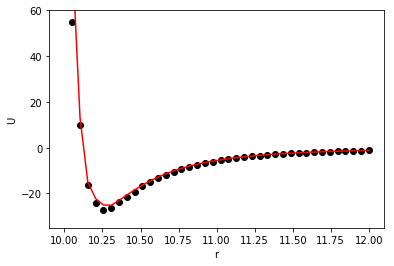

In [59]:
U_opt, _ = zip(*system.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

Text(0,0.5,'U')

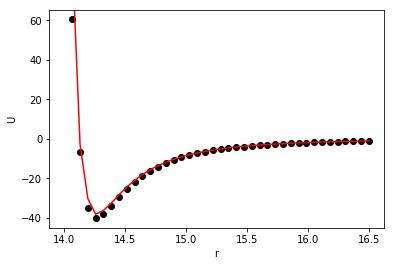

In [60]:
U_opt2, _ = zip(*system2.calc_potential(forcefield=optimization.forcefield, separations=r2))

plt.plot(r2, U2, linestyle='None', marker='o', color='black')
plt.plot(r2, U_opt2, marker='None', color='red')
plt.ylim(-45, 65)
plt.xlabel('r')
plt.ylabel('U')